In [1]:
import numpy as np
import random
from scipy.optimize import minimize, minimize_scalar

In [64]:
n = 2
F = 500

a = [random.uniform(1, n) for _ in range(n)]
c = [random.uniform(1, n) for _ in range(n)]

### Рассматриваемые функции

Так $z$ вычисляется уже в самом цикле, ниже описан неопреленный интеграл, т.е. необходимо считать $z(x_i)-z(0)$, что и делается ниже
$$z(x_k) = \sum_{i=1}^n{\int_{0}^{x_i}((\frac{u}{a_i})^3 + c_i)du}$$
Та же история с $f$
$$f_i = \int_{0}^{x_i}((\frac{u}{a_i})^3 + c_i)du$$
$$df_i = (\frac{x_i}{a_i})^3 + c_i$$

In [65]:
f_i = lambda x, a, c : x**4/(a)**3 + c*x
z = lambda x_i : sum([f_i(x_j, a_i, c_i) for x_j, a_i, c_i in zip(x_i, a, c)])
df_i = lambda x, a, c : (x/a)**3 + c

### Ограничения
$$\sum_{i=1}^{n}{x_i}=F$$
$$x_i>0$$

In [66]:
cons = ({'type' : 'eq', 'fun' : lambda x : sum(x) - F},
        {'type' : 'ineq', 'fun' : lambda x : x})

### Инициализация

In [67]:
x_k = np.array([F/n for _ in range(n)])
LBD = 0
precision = 1
eps = 1e-3

xes = []

### Алгоритм Франка-Вульфа

In [68]:
while precision > eps:
#     1. Minimizing lianirized function
    zx_k = z(x_k) - z(np.zeros(n))
    dzx_k = np.array([df_i(x_i, a_i, c_i) for x_i, a_i, c_i in zip(x_k, a, c)])
    z_ = lambda x : zx_k + np.dot(dzx_k, x-x_k)
    y_k = minimize(z_, x_k, constraints=cons).x
    p_k = y_k - x_k
#     2. Calculating precision
    LBD = max(LBD, z_(y_k))
    precision = (z_(x_k) - LBD)/LBD
#     3. Step determination
    bounds = ((0, 1))
    step = minimize_scalar(lambda l : z(x_k + l*p_k) - z(l*p_k), bounds=bounds, method='bounded')
    x_k = x_k + p_k*step.x
    xes.append((x_k, z(x_k) - z(np.zeros(n))))
    print(x_k)
    print()

print(x_k, z(x_k)-z(np.zeros(n)))


[ 250.  250.]

[ 250.  250.] 3169962690.4


In [60]:
a_i = a[0]
x_i = x_k[0]
c_i = c[0]
df_i(x_i, a_i, c_i) 

3034254.736962541

### Сравнение со стандартным алгоритмом минимизации

In [69]:
x_k_act = np.array([F/n for _ in range(n)])
x_actual = minimize(z, x_k_act, constraints=cons, tol = 1e-3).x
print(x_actual, z(x_actual)-z(np.zeros(n)))

[ 250.  250.] 3169962690.4


### График будет работать, только при n = 2

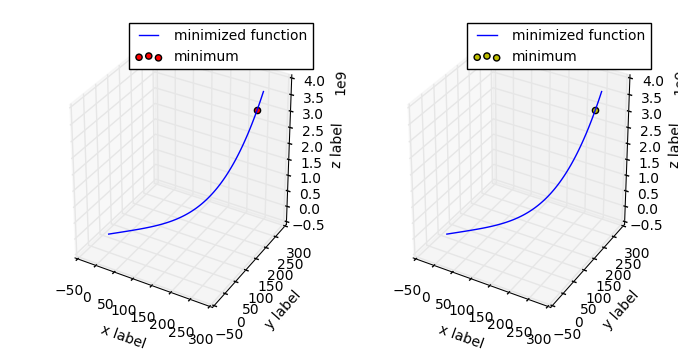

In [133]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=plt.figaspect(0.5))
plt.axis('off')

plt.hold(True)

x = np.linspace(0, 260, 100)
y = np.linspace(0, 260, 100)
zax = np.array([z(xi)-z(np.zeros(n)) for xi in zip(x, y)])

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(x, y, zax, label = 'minimized function')
ax.scatter(x_k[0], x_k[1], z(x_k)-z(np.zeros(n)), c='r', label = 'minimum')

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

# ax.view_init(azim=-30, elev=5)

ax.legend()


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(x, y, zax, label = 'minimized function')
ax.scatter(x_actual[0], x_actual[1], z(x_actual)-z(np.zeros(n)), c='y', label = 'minimum')

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

ax.legend()

plt.show()
